# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [67]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [68]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [69]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

***Answer***: In order to be able to compute the matrix product involving the X matrix, we need to make its dimensionality (442, 1), instead of (442,). We need a 2-dim array instead of a 1-dim array. To do this, the function `np.newaxis` adds a dimension.

Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [70]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [71]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
sys.path.append('code/')

# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_lest = diabetes.target[300:, np.newaxis]

beta = lsq(X_train, y_train)

# print the parameters
print(beta)

[[ 152.34786452]
 [ -16.57607993]
 [-254.66532396]
 [ 560.98630022]
 [ 278.91811152]
 [-393.41357305]
 [  97.05460405]
 [ -19.0023093 ]
 [ 169.46450327]
 [ 632.95050374]
 [ 114.21638941]]


What we see are the weights of the linear regression model. The first weight corresponds to the bias term (`w_0`) and the other weights correspond to the features in the order they are stored in the data matrix `X`.

In [72]:
#now we calculate the mean squared error on the test set, after adding a column 1 to X_test (bias term)
y_pred = regression(beta, X_test)
print(mean_squared_error(y_test, y_pred))

2794.5690145007266


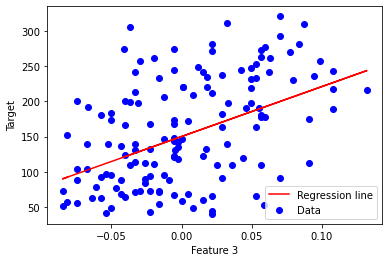

In [73]:
# use only one feature for regression
X_train_1d = X_train[:, 3:4]
X_test_1d = X_test[:, 3:4]

beta_1d = lsq(X_train_1d, y_train)
y_pred_1d = regression(beta_1d, X_test_1d)

plt.scatter(X_test_1d, y_test, color='blue', label='Data')
plt.plot(X_test_1d, y_pred_1d, color='red', label='Regression line')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.legend()
plt.show()

### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

In [74]:
def knn(x_data, y_data, k):
    """
    Performs k-nearest neighbor algorithm. First calculates the distances between all nodes. 
    Then finds the nearest k nodes and takes majority vote of the class with division [0.0,0.5), [0.5,1.0].

    Args:
        x_data (array): Matrix with the nodes and features.
        y_data (array): Matrix with the assigned classes of the nodes
        k (int): Number of nearest neighbors.
    
    Returns:
        accuracy (float): Float describing the accuracy of the knn class predictions.
    """
    range_data = range(len(x_data))

    # calculate distances
    distance_matrix = scipy.spatial.distance.cdist(x_data, x_data, metric='euclidean') # matrix of distance between each X_data, diagonal is 0
    # get k+1 nearest value and then save the values of those lower
    k_distances = [distance_matrix[i][distance_matrix[i] < [np.sort(distance_matrix[i])][0][k]] for i in range_data]
    # get index corresponding to k nearest values
    k_indices = np.array([[np.where(distance_matrix[i] == k_distances[i][j])[0][0] for j in range(k)] for i in range_data])
    # sum corresponding y values and divide by k
    y_normalized = [sum([y_data[k_indices[i][j]][0] for j in range(k)])/k for i in range_data]
    # assign classes [0,1] based on normalized y
    y_pred = [[0 if y < 0.5 else 1] for y in y_normalized]

    accuracy = list(y_pred == y_data).count(True) / len(y_data)

    return accuracy

In [75]:
import scipy

# normalize features in data, by max
for i in range(np.shape(breast_cancer.data)[1]):
    breast_cancer.data.T[i] = np.array([float(value)/max(breast_cancer.data.T[i]) for value in breast_cancer.data.T[i]]).T

X_data = breast_cancer.data[:] # (569,30)
y_data = breast_cancer.target[:, np.newaxis] # (569,1), [0] or [1]

# split data into training and test sets (80/20)
np.random.seed(42)
indices = np.random.permutation(len(X_data))
split_idx = int(0.8 * len(X_data))

X_train = X_data[indices[:split_idx]] # (455,30)
y_train = y_data[indices[:split_idx]] # (455,1)
X_test = X_data[indices[split_idx:]] # (114,30)
y_test = y_data[indices[split_idx:]] # (114,1)

n_k = 100 # max number of k to test
k_list = np.linspace(1,n_k,n_k, dtype=int)
accuracy_list_train = []
accuracy_list_test = []

for k in k_list:
    accuracy_list_train.append(knn(X_train, y_train, k))
    accuracy_list_test.append(knn(X_test, y_test, k))

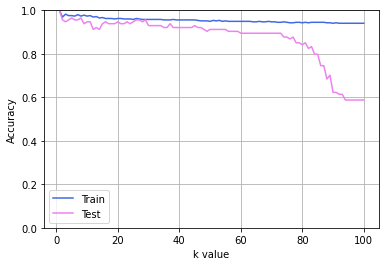

In [76]:
# visualisation, plot accuracy against k value
plt.figure()
plt.grid()
plt.plot(k_list, accuracy_list_train, c="royalblue", label="Train")
plt.plot(k_list, accuracy_list_test, c="violet", label ="Test")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.ylim([0,1])
plt.legend()

plt.show()

From the plot we can see that a k value of 1 results in 100% accuracy, which is expected as each node predicts its own class. We can also see that the accuracy remains quite high for the train dataset, while the accuracy of the test set steadily declines and after k=80 drops to about 60%. This is because of the relatively large k-value for the test dataset, which only contains 114 points. The classification itself performs quite well: mostly around 90%. This is because of the large amount of features used. When using less features the accuracy will decline lower, as there will be less information available to distinguish between the classes. 

### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

In [77]:
def knn_regression(x_data, y_data, x_test, k):
    """
    Performs k-nearest neighbor regression. Calculates distances between test nodes and all training nodes.
    Then finds the nearest k nodes and takes average of their target values.

    Args:
        x_data (array): Matrix with training nodes and features.
        y_data (array): Matrix with target values of training nodes
        x_test (array): Matrix with test nodes and features
        k (int): Number of nearest neighbors.
    
    Returns:
        y_pred (array): Array with predicted values for test data.
    """
    # calculate distances between test points and all training points
    distance_matrix = scipy.spatial.distance.cdist(x_test, x_data, metric='euclidean')
    
    # get indices of k nearest neighbors for each test point
    k_indices = np.argpartition(distance_matrix, k, axis=1)[:, :k]
    
    # get target values of k nearest neighbors and calculate mean
    y_neighbors = y_data[k_indices]
    y_pred = np.mean(y_neighbors, axis=1)
    
    return y_pred


In [78]:
# load diabetes dataset
diabetes = load_diabetes()
X_data = diabetes.data  # (442, 10)
y_data = diabetes.target  # (442,)

# normalize features by max (same style as original)
for i in range(np.shape(X_data)[1]):
    X_data.T[i] = np.array([float(value)/max(X_data.T[i]) for value in X_data.T[i]]).T

# split data into training and test sets (80/20)
np.random.seed(42)
indices = np.random.permutation(len(X_data))
split_idx = int(0.8 * len(X_data))

X_train = X_data[indices[:split_idx]]
X_test = X_data[indices[split_idx:]]
y_train = y_data[indices[:split_idx]]
y_test = y_data[indices[split_idx:]]

In [79]:
# create correct format
ones = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((ones, X_test), axis=1)

# Predict using the learned parameters
beta = lsq(X_train, y_train) # weights
y_pred = X_test @ beta

# Calculate the mean squared error
mse_lin = np.mean((y_pred.reshape(-1, 1) - y_test.reshape(-1, 1)) ** 2)
print(f"Mean squared error on test set: {mse_lin:.4f}")

Mean squared error on test set: 3368.0263


k =  1 - MSE: 3981.3933
k =  3 - MSE: 3238.4819
k =  5 - MSE: 3239.6517
k =  7 - MSE: 3014.2724
k =  9 - MSE: 2944.8713
k = 11 - MSE: 2931.7968
k = 13 - MSE: 3014.8007
k = 15 - MSE: 3126.6572
k = 17 - MSE: 3191.8530
k = 19 - MSE: 3197.0441
k = 21 - MSE: 3208.7208
k = 23 - MSE: 3260.2529
k = 25 - MSE: 3298.9412
k = 27 - MSE: 3310.0599
k = 29 - MSE: 3343.1673
k = 31 - MSE: 3354.3199
k = 33 - MSE: 3382.5071
k = 35 - MSE: 3431.0463
k = 37 - MSE: 3495.0172
k = 39 - MSE: 3528.8356
k = 41 - MSE: 3495.4647
k = 43 - MSE: 3566.9065
k = 45 - MSE: 3592.6306
k = 47 - MSE: 3593.1954
k = 50 - MSE: 3584.8581


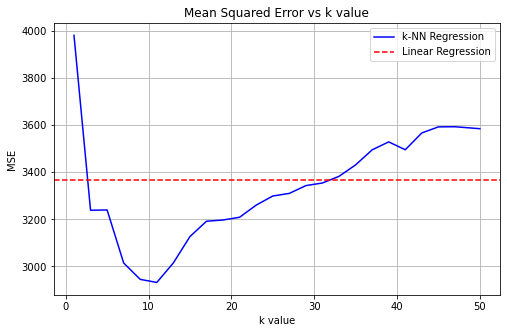


Beste k-NN performance: k = 11
MSE: 2931.7968
Vergelijking met Linear Regression:
MSE verschil: 436.2295


In [80]:
# test k-NN regression for different k values (alleen MSE)
n_k = 50  # max number of k to test
k_list = np.linspace(1, n_k, int(np.floor(n_k/2)), dtype=int)  # 1 to n_k in steps of 2
mse_list = []

# split data into training and test sets (80/20)
np.random.seed(42)
indices = np.random.permutation(len(X_data))
split_idx = int(0.8 * len(X_data))

X_train = X_data[indices[:split_idx]]
X_test = X_data[indices[split_idx:]]
y_train = y_data[indices[:split_idx]]
y_test = y_data[indices[split_idx:]]

for k in k_list:
    y_pred_knn = knn_regression(X_train, y_train, X_test, k)
    mse = np.mean((y_pred_knn.reshape(-1, 1) - y_test.reshape(-1, 1)) ** 2) 
    mse_list.append(mse)
    print(f"k = {k:2d} - MSE: {mse:.4f}")

# visualisation, plot MSE against k value
fig, ax = plt.subplots(figsize=(8, 5))
ax.grid()
ax.plot(k_list, mse_list, 'b-', label='k-NN Regression')
ax.axhline(y=mse_lin, color='r', linestyle='--', label='Linear Regression')
ax.set_xlabel("k value")
ax.set_ylabel("MSE")
ax.set_title("Mean Squared Error vs k value")
ax.legend()
plt.show()

# show best k value and comparison with linear regression
best_k_idx = np.argmin(mse_list)
best_k = k_list[best_k_idx]
best_mse = mse_list[best_k_idx]
print(f"\nBeste k-NN performance: k = {best_k}")
print(f"MSE: {best_mse:.4f}")
print(f"Vergelijking met Linear Regression:")
print(f"MSE verschil: {mse_lin - best_mse:.4f}")

### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>



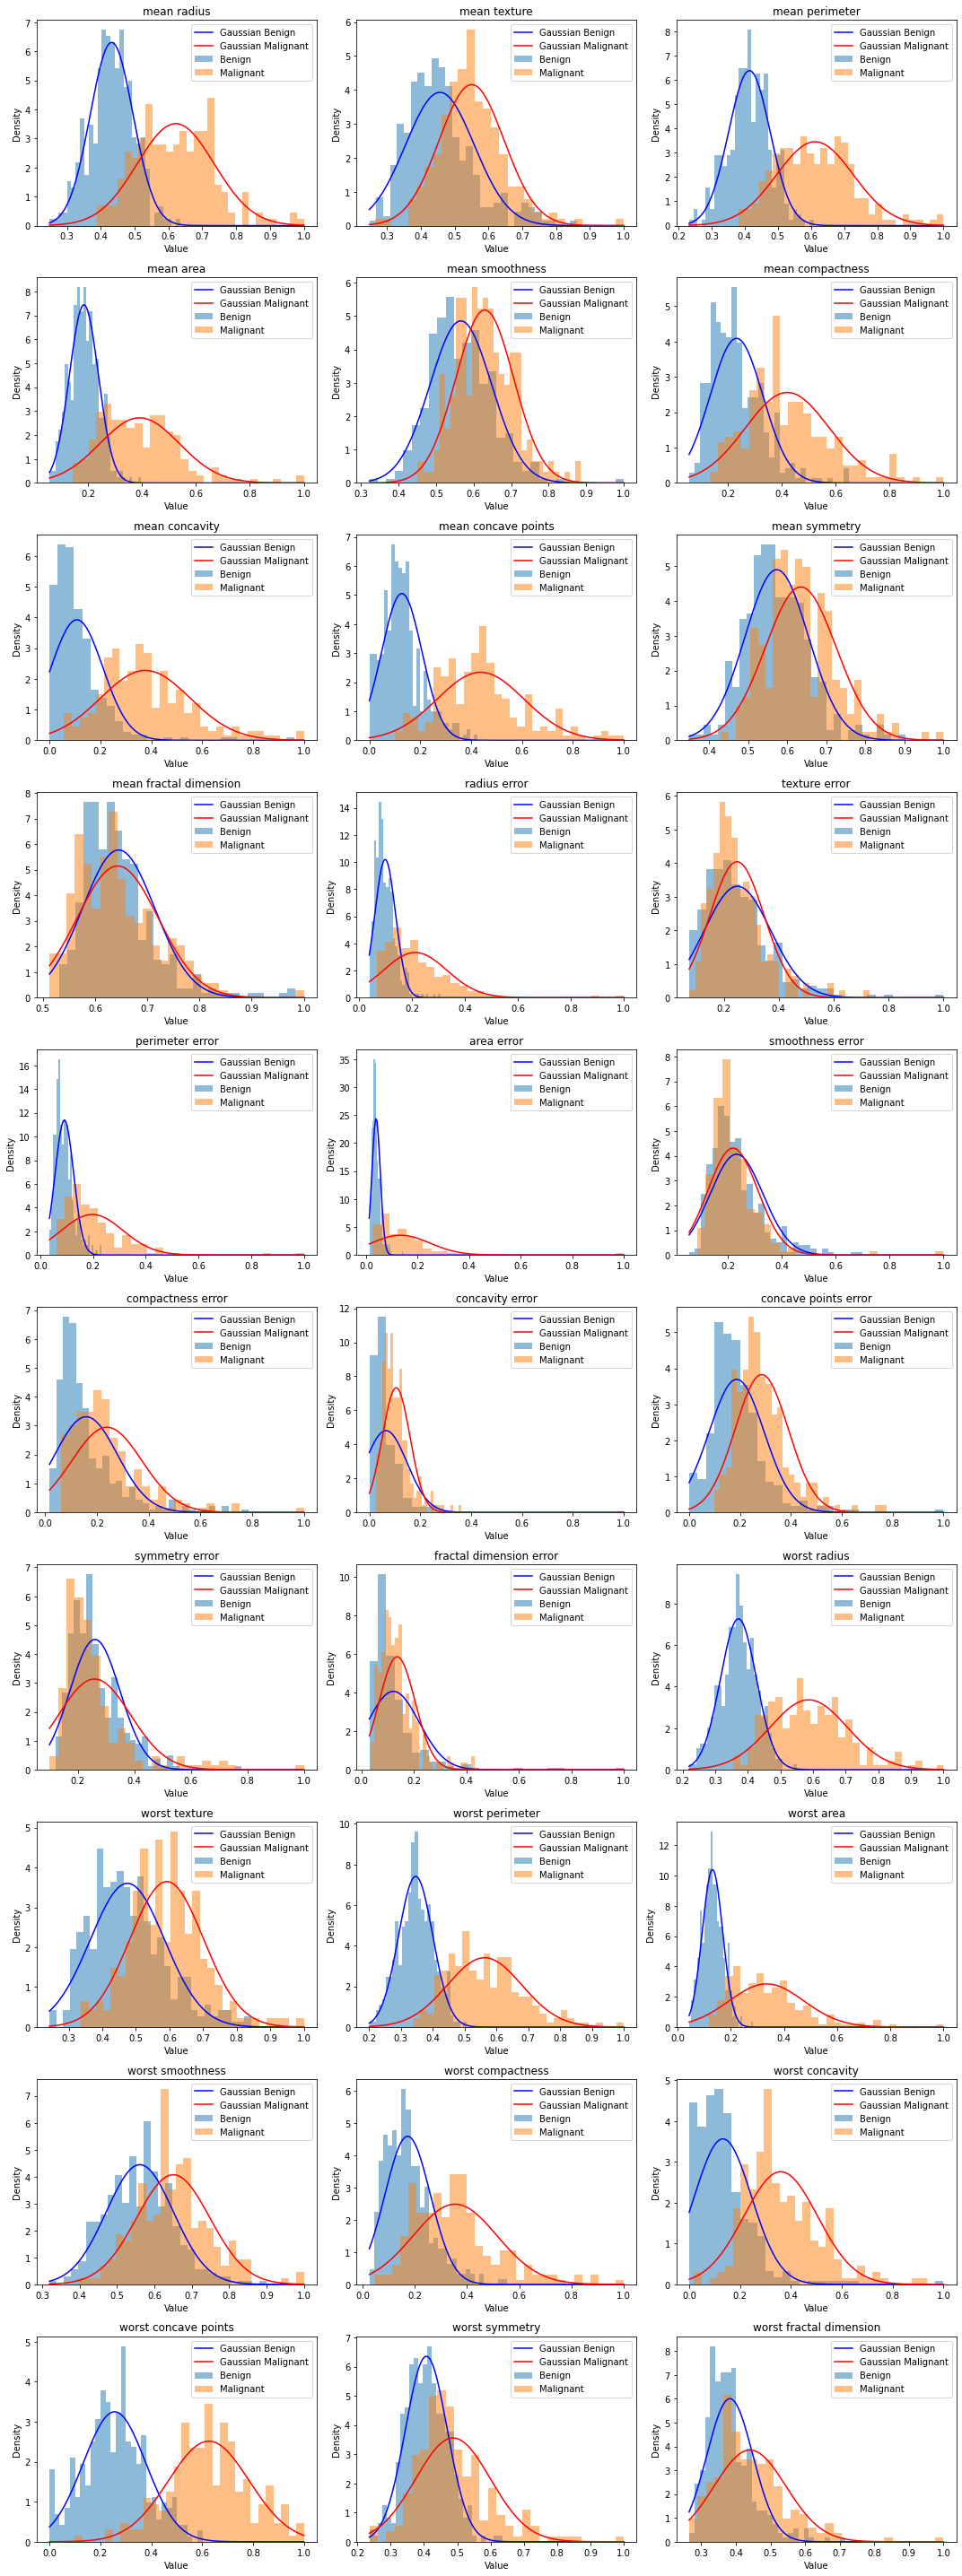

In [81]:
X = breast_cancer.data
y = breast_cancer.target

means, stds = compute_class_stats(X, y)
plot_class_conditional(X, y, breast_cancer.feature_names, means, stds)

The feature “worst area” (or equivalently “worst radius” and “worst perimeter”) best discriminates between benign and malignant tumors.
The Gaussian distributions for the two classes are well separated, with the malignant class shifted toward larger values. This minimal overlap means that the feature provides strong predictive power for class membership.